# Assignment 5
This assignment consists of 7 exercises divided over three notebooks. Each exercise will come with some tests that are used to verify whether your code is correct. If you pass these tests then you are rewarded *full points*; if your code fails then you will get *no points*. Make sure to **read the rules** before you start the assignment.

## Rules
For this assignment the following rules apply:

**General**
 * The assignment should be completed with the same **groups of three** as the previous assignment
 * Any kind of intergroup discussion will be considered fraud and both the parties will be punished.
 * All code must be written intra group. All external help, with the exception of Python/library documentation and the lecture slides, will be considered fraud.
 * Do not use libraries that implement the assignment for you.

**Grading**
 * If a test cell runs without error (warnings are allowed) then you receive full points.
 * If a test cell throws an error for any reason then you receive 0 points.
  * If a cell takes more than five minutes to complete then this is considered an error.
 * If your code fails a test for *any reason* then you receive 0 points for that exercise.
 * Your grade is computed as $\frac{\text{points}}{\text{max_points}} * 9 + 1$ and will be rounded to the closest 0.5 point.
 * Submit your code to Brightspace as a zip file containing only the notebook (`*.ipynb`) files.
 * **Do not rename the notebook files**

**Late Submissions**
 * Late submissions must be submitted *as soon as possible* to the "Assignment 5 - Late Submissions" assignment on Brightspace.
 * The following penalty will be applied: $\text{adjusted grade} = \text{grade} - 1 - \lceil \frac{\text{minutes late}}{10} \rceil$

<br />
 
**Before you submit**, make sure that you are not accidentaly using any global variables. Restart the kernel (wiping all global variables) and run the code from top to bottom by clicking "Kernel" => "Restart & Run all" in the menu bar at the top.

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../../")
import helpers

# Least Squares
In the previous weeks you have learned to describe and solve problems using linear systems. Most linear systems we encountered so far had exactly one solution, because the number of constrains matched the number of free variables (matrix $A$ was square).

We can also find ourselves in a situation however where we want to solve a linear system where there are more constrains than free variables (like in the camera matrix estimation exercise). In these cases finding an exact solution is not possible. Thus we aim to find a solution which minimizes the error of the output solution. 

## Ordinary least squares
Least squares is a standard approach for dealing with overconstrained system. As the name suggests, least squares finds a solution which minimizes the sum of squared differences of the error. In ordinary least squares the function must be linear with respect to its free variables (such that it forms a linear system). If we were to fit a function to a dataset than this does not mean that the function itself has to be linear with respect to it's input. Only that the free variables for which we are trying to solve have to be linear. For example, ordinary least squares may be applied to the following function which is non-linear with respect to x (but linear w.r.t. $\beta$): $f(x, \vec{\beta}) = \beta_0 + \beta_1x_1 + \beta_2{x_2}^2 + \beta_3{x_3}^3 + ...$ . In this case the goal of least squares is to find the optimal value for $\vec{\beta}$ such that $S = \sum_{i=1}^{n} {\lVert y_i - f(x_i, \vec{\beta}) \rVert}^2$ is minimized, where $x_i$/$y_i$ are the known data points.

The problem can also be written down in matrix form as $A\vec{x}=\vec{b}$, where $A$ stores the constraints, $\vec{b}$ contains our measurements and $\vec{x}$ is contains the least squares solution. For example, if we were trying to fit data points $\begin{pmatrix}1\\1\end{pmatrix}$, $\begin{pmatrix}5\\4\end{pmatrix}$, $\begin{pmatrix}2\\3\end{pmatrix}$ to the function $f(x) = ax + b$ then the equation would look like:

$$
\begin{pmatrix}
1 & 1\\
5 & 1\\
2 & 1\\
\end{pmatrix}
\vec{x} =
\begin{pmatrix}
1\\
4\\
3\\
\end{pmatrix}
$$

The ordinary least squares solution can be computed as $\vec{x} = (A^T A)^{-1} A^T \vec{b}$.

### Exercise 1 (1 points)
Use least squares to fit a linear function $f(x)=ax+b$ to the given set of 2D points.

Use `np.linalg.lstsq` to solve the least squares problem. *You may ignore the `FutureWarning: 'rcond' parameter will change to the default ...` warning.*

Least squares SSD: 0.015033453900645513


/tmp/ipykernel_869261/2300749930.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, b)[0]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
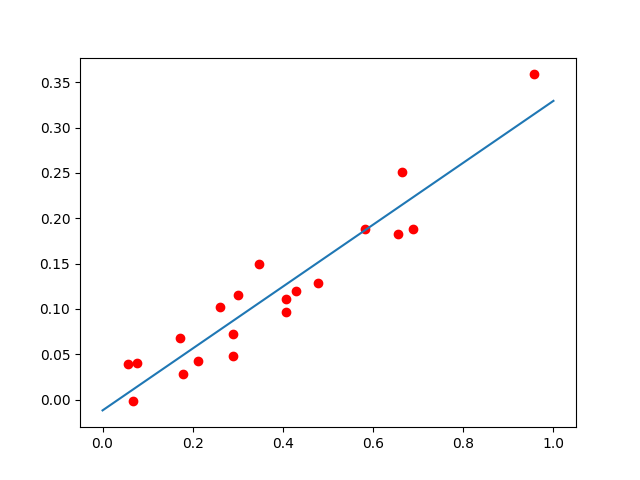

In [2]:
def solve_linear_function(points2D):
    A = np.c_[points2D[0,:], np.ones(points2D.shape[1])]
    b = points2D[1,:]
    return np.linalg.lstsq(A, b)[0]

def generate_linear_dataset(N):
    v = np.random.sample((N))
    x = v + (np.random.sample((N)) - 0.5) * 0.05
    y = 1/3 * v + (np.random.sample((N)) - 0.5) * 0.1
    return np.stack([x, y], axis=0)

np.random.seed(51)
points2D = generate_linear_dataset(20)
a, b = solve_linear_function(points2D)

def f(x, a, b):
    return a*x + b

x = points2D[0,:]
y = points2D[1,:]
print(f"Least squares SSD: {helpers.SSD(f(x, a, b), y)}")

fig, ax = plt.subplots()
ax.scatter(points2D[0,:], points2D[1,:], color="r")
ax.plot([0, 1], [f(0, a, b), f(1, a, b)])
plt.show()

### Tests of exercise 1
Your solution should pick a function (line) that gets close to all points.

### Exercise 2 (1 point)
Least squares can also be used to find the parameters of a functions that are not linear with respect to $x$ (as long as they are linear to $\beta$). Use the least squares method that you just implement to match a quadratic polynomial function $f(x) = ax^2 + bx + c$ to a given set of data points.

Use `np.linalg.lstsq` to solve the least squares problem. *You may ignore the `FutureWarning: 'rcond' parameter will change to the default ...` warning.*

/tmp/ipykernel_869261/2827929179.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, b)[0]


Least squares SSD: 0.024560472734307264


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
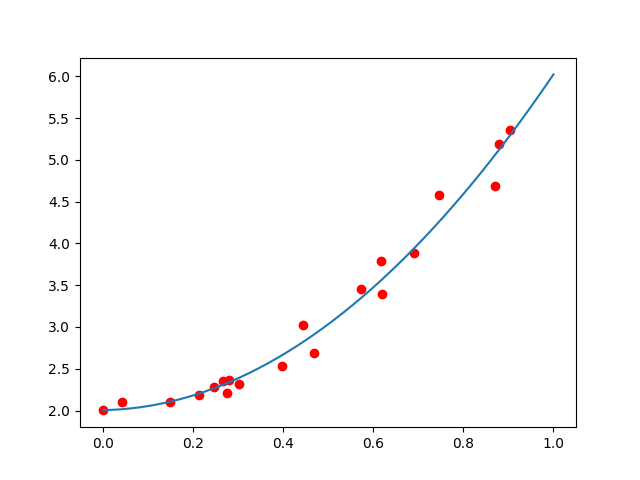

In [3]:
def solve_quadratic_polynomial(points2D):
    A = np.c_[points2D[0,:]**2, points2D[0,:], np.ones(points2D.shape[1])]
    b = points2D[1,:]
    return np.linalg.lstsq(A, b)[0]

def generate_quadratic_dataset(N):
    a = 3
    b = 0.5
    c= 2
    
    # Generate points along curve
    x = np.random.sample((N))
    y = a * x ** 2 + b * x + c
    
    # Add noise
    x += 0.2 * (np.random.sample((N)) - 0.5)
    y += 0.2 * (np.random.sample((N)) - 0.5)
    return np.stack([x, y], axis=0)

np.random.seed(42)
points2D = generate_quadratic_dataset(20)
a, b, c = solve_quadratic_polynomial(points2D)

def f(x, a, b, c):
    return a*(x**2) + b*x + c

plot_x = np.linspace(0, 1)
plot_y = a * plot_x**2 + b * plot_x + c

x = points2D[0,:]
y = points2D[1,:]
print(f"Least squares SSD: {helpers.SSD_per_pixel(f(x, a, b, c), y)}")

fig, ax = plt.subplots()
ax.scatter(points2D[0,:], points2D[1,:], color="r")
ax.plot(plot_x, plot_y)
plt.show()

### Tests of exercise 2
Your solution should pick a function (line) that gets close to all points.